In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
performance_df = pd.read_csv('performance.csv')
performance_df

ID          dataset  attributes  instances  classes  mv_acc  ucm_acc  \
0    1          abalone           8       4177       29   26.56    26.41   
1    2           anneal          38        798        6   92.60    91.35   
2    3       arrhythmia         279        452       16   66.74    65.41   
3    4        audiology          69        226       24   82.23    78.72   
4    5    breast-cancer           9        286        2   71.55    70.48   
5    6  breast-cancer-w           9        699        2   96.85    96.85   
6    7              car           6       1728        4   88.72    89.35   
7    8              crx          15        690        2   84.18    84.18   
8    9      dermatology          34        366        6   97.24    96.97   
9   10            ecoli           7        336        4   86.54    86.25   
10  11            glass          10        214        7   66.28    65.76   
11  12       ionosphere          34        351        2   92.86    91.14   
12  13             iris           5        150        3   95.33    95.33   
13  14         kr-vs-kp          36       3196        2   96.87    96.40   
14  15        labor-neg          16         57        2   94.33    94.33   
15  16           letter          16      20000       26   92.36    91.39   
16  17  liver disorders           6        345        2   72.94    72.06   
17  18     lymphography          20        148        4   80.95    80.29   
18  19          nursery           8      12960        5   90.57    90.90   
19  20      page-blocks          10       5473        5   96.05    96.18   
20  21          segment          21       2310        7   95.93    96.32   
21  22            sonar         208         60        2   66.71    66.74   
22  23         spambase          57       4601        2   93.91    93.98   

    wmv_acc  mv_f1  ucm_f1  wmv_f1  
0     26.03  23.66   23.41   23.48  
1     92.22  92.64   91.11   92.27  
2     66.08  58.04   55.62   57.03  
3     82.25  78.47   73.88   78.70  
4     70.18  67.95   67.31   67.96  
5     97.00  96.87   96.87   97.01  
6     87.50  89.18   89.59   87.67  
7     83.46  82.74   83.05   82.76  
8     97.24  97.23   96.94   97.21  
9     86.55  85.62   85.28   85.66  
10    70.48  61.50   60.56   66.45  
11    90.29  92.66   90.80   89.88  
12    95.33  95.29   95.29   95.29  
13    95.93  96.86   96.37   95.90  
14    96.33  94.19   94.19   96.19  
15    94.76  92.41   91.43   94.78  
16    73.24  72.81   71.23   72.69  
17    81.67  79.71   78.79   80.60  
18    89.29  89.76   90.10   88.64  
19    96.03  95.57   95.76   95.71  
20    96.19  95.87   96.28   96.14  
21    67.64  65.39   65.87   66.96  
22    93.83  93.88   93.96   93.81

In [12]:
performance_df.describe()

ID  attributes     instances    classes     mv_acc    ucm_acc  \
count  23.00000   23.000000     23.000000  23.000000  23.000000  23.000000   
mean   12.00000   40.043478   2592.304348   7.130435  83.839130  83.338696   
std     6.78233   67.251548   4781.746566   8.236859  16.404707  16.531784   
min     1.00000    5.000000     57.000000   2.000000  26.560000  26.410000   
25%     6.50000    8.500000    256.000000   2.000000  76.945000  75.390000   
50%    12.00000   16.000000    452.000000   4.000000  90.570000  90.900000   
75%    17.50000   35.000000   2753.000000   6.500000  94.830000  94.830000   
max    23.00000  279.000000  20000.000000  29.000000  97.240000  96.970000   

         wmv_acc      mv_f1     ucm_f1     wmv_f1  
count  23.000000  23.000000  23.000000  23.000000  
mean   83.892174  82.534783  81.899565  82.730000  
std    16.340115  17.766370  18.031676  17.550975  
min    26.030000  23.660000  23.410000  23.480000  
25%    77.455000  75.640000  72.555000  75.695000  
50%    89.290000  89.760000  90.100000  88.640000  
75%    95.630000  94.740000  94.740000  95.500000  
max    97.240000  97.230000  96.940000  97.210000

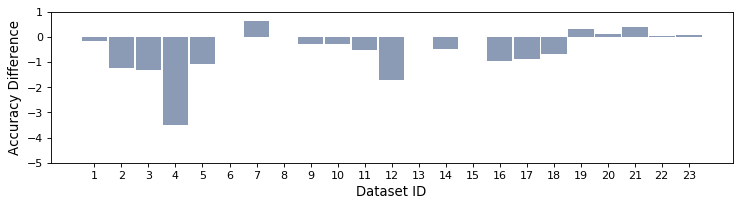

In [3]:
datasets = performance_df['dataset']
acc_diff = performance_df['ucm_acc'] - performance_df['mv_acc']

figure(figsize=(11, 2.5), dpi=80)
plt.xticks(performance_df['ID'])
plt.xlabel('Dataset ID', fontsize=12)
plt.ylabel('Accuracy Difference', fontsize=12)
plt.ylim(-5, 1)

plt.bar(performance_df['ID'], acc_diff, color='#8c9bb5', width=0.95)
plt.savefig('accuracy-graph.png', bbox_inches="tight")

**Comment**: The graph above shows the accuracy difference between UCM and Majority Voting. As most of the bars are below 0, we can say that Majority Voting is the winner.

<BarContainer object of 23 artists>

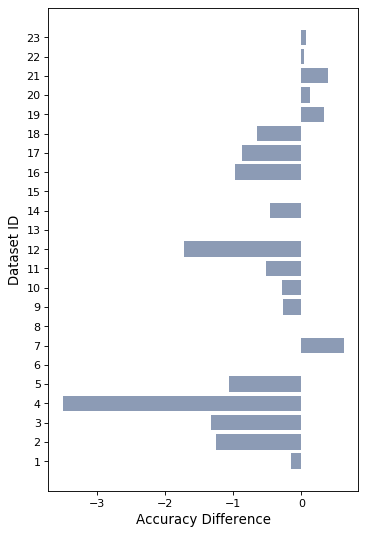

In [4]:
# this is the same graph as the one above but shown vertically

figure(figsize=(5, 8), dpi=80)
plt.xlabel('Accuracy Difference', fontsize=12)
plt.yticks(performance_df['ID'])
plt.ylabel('Dataset ID', fontsize=12)
plt.barh(performance_df['ID'], acc_diff, color='#8c9bb5')

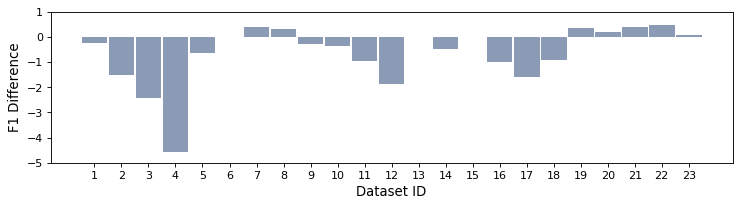

In [5]:
f1_diff = performance_df['ucm_f1'] - performance_df['mv_f1']

figure(figsize=(11, 2.5), dpi=80)
plt.xticks(performance_df['ID'])
plt.xlabel('Dataset ID', fontsize=12)
plt.ylabel('F1 Difference', fontsize=12)
plt.ylim(-5, 1)

plt.bar(performance_df['ID'], f1_diff, color='#8c9bb5', width=0.95)
plt.savefig('f1-graph.png', bbox_inches="tight")

**Comment**: The graph above shows the $F_1$ difference between UCM and Majority Voting. Regarding this metric, Majority Voting is still the winner on most of the datasets and a very similar pattern to the accuracy difference is observed.

R^2 score: 0.005220518803246588


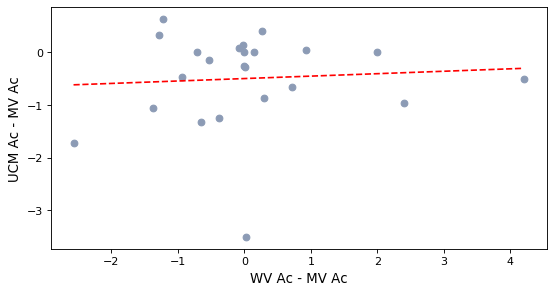

In [6]:
ucm_mv_acc_diff = performance_df['ucm_acc'] - performance_df['mv_acc']
wmv_mv_acc_diff = performance_df['wmv_acc'] - performance_df['mv_acc'] 

figure(figsize=(8, 4), dpi=80)
plt.xlabel('WV Ac - MV Ac', fontsize=12)
plt.ylabel('UCM Ac - MV Ac', fontsize=12)
plt.scatter(wmv_mv_acc_diff, ucm_mv_acc_diff, color='#8c9bb5')

slope, intercept = np.polyfit(wmv_mv_acc_diff, ucm_mv_acc_diff, 1)
x_min = wmv_mv_acc_diff.min()
y_min = slope*x_min + intercept
x_max = wmv_mv_acc_diff.max()
y_max = slope*x_max + intercept
plt.plot([x_min, x_max], [y_min, y_max], color='red', linestyle='--')
plt.savefig('wv-graph.png', bbox_inches="tight")

y_true = ucm_mv_acc_diff
y_fit = slope*wmv_mv_acc_diff + intercept
print(f"R^2 score: {r2_score(y_true, y_fit)}")

**Comment**: With the line of best fit being nearly horizontal, the relative performance of Weighted Voting (or WV) has little effect on the relative performance of UCM with respect to Majority Voting (MV) 

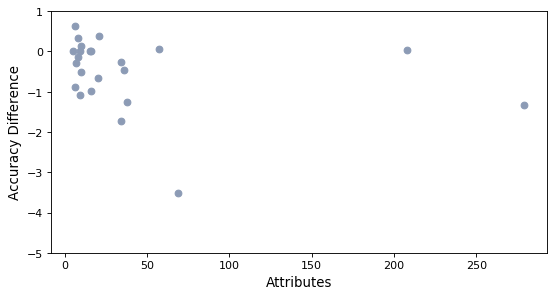

In [7]:
figure(figsize=(8, 4), dpi=80)
plt.xlabel('Attributes', fontsize=12)
plt.ylabel('Accuracy Difference', fontsize=12)
plt.ylim(-5, 1)

plt.scatter(performance_df['attributes'], acc_diff, color='#8c9bb5')

**Comment**: The graph above shows no relationship between the number of attributes and the accuracy difference between UCM and MV.

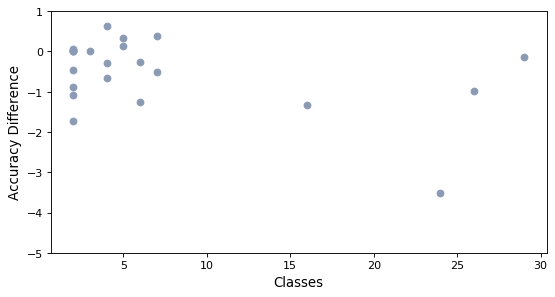

In [8]:
figure(figsize=(8, 4), dpi=80)
plt.xlabel('Classes', fontsize=12)
plt.ylabel('Accuracy Difference', fontsize=12)
plt.ylim(-5, 1)

plt.scatter(performance_df['classes'], acc_diff, color='#8c9bb5')

**Comment**: The graph above shows no relationship between the number of classes and the accuracy difference between UCM and MV.

R^2 score: -0.08586902513910477


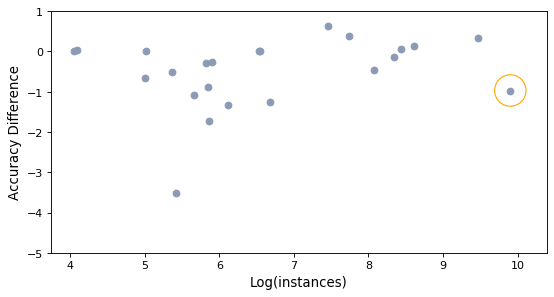

In [9]:
figure(figsize=(8, 4), dpi=80)
plt.xlabel('Log(instances)', fontsize=12)
plt.ylabel('Accuracy Difference', fontsize=12)
plt.ylim(-5, 1)
plt.scatter(np.log(performance_df['instances']), acc_diff, color='#8c9bb5')

plt.scatter(np.log(performance_df['instances'][15]), acc_diff[15], s=800, facecolors='none', edgecolors='orange')

y_true = acc_diff 
y_fit = slope*np.log(performance_df['instances']) + intercept 
print(f"R^2 score: {r2_score(y_true, y_fit)}")

plt.savefig('instances-acc-graph.png', bbox_inches="tight")

**Comment**: There seems to be an increasing relationship between the number of instances and the accuracy difference between UCM and MV. However, there is an outlier (circled).

R^2 score: 0.11255741672134822


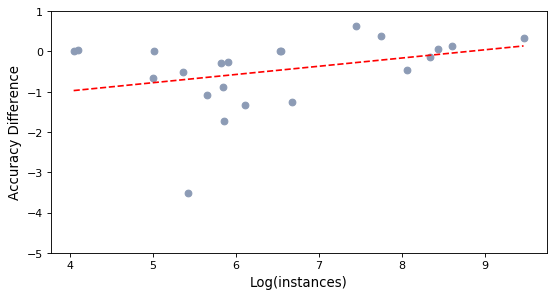

In [10]:
nolet_df = performance_df.drop(15) # drop the letter dataset
nolet_acc_diff = nolet_df['ucm_acc'] - nolet_df['mv_acc']

figure(figsize=(8, 4), dpi=80)
plt.xlabel('Log(instances)', fontsize=12)
plt.ylabel('Accuracy Difference', fontsize=12)
plt.ylim(-5, 1)
plt.scatter(np.log(nolet_df['instances']), nolet_acc_diff, color='#8c9bb5')

slope, intercept = np.polyfit(np.log(nolet_df['instances']), nolet_acc_diff, 1)
x_min = np.log(nolet_df['instances']).min()
y_min = slope*x_min + intercept
x_max = np.log(nolet_df['instances']).max()
y_max = slope*x_max + intercept
plt.plot([x_min, x_max], [y_min, y_max], color='red', linestyle='--')

y_true = nolet_acc_diff 
y_fit = slope*np.log(nolet_df['instances']) + intercept 
print(f"R^2 score: {r2_score(y_true, y_fit)}")

plt.savefig('instances-acc-no-let-graph.png', bbox_inches="tight")

**Comment**: If we drop this outlier, the line of best fit seems much better and the $R^2$ score is also higher.